<a href="https://colab.research.google.com/github/deutandev/machine_learning_lab/blob/main/L200180014_02_Praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

# Lab 2: Data Analysis and Visualisation, Naive Bayes Classifier

In this lab we work with a spam filtering dataset. We will perform exploratory data analysis, visualisation and, finally, we learn how to perform classification tasks using Naive Bayes. For this, we will use the the packages introduced in Lab 1, and `scikit-learn` package (`sklearn`): a machine learning library for Python which works with numpy array, and pandas DataFrame objects.

**Please Note**: Throughout this lab we make reference to [`methods`](https://en.wikipedia.org/wiki/Method_%28computer_programming%29) for specific objects e.g. "make use of the predict method of the MultinomialNB classifier". If you get confused, refer to the documentation and just ctrl+f for the object concerned:
* [Scikit-learn API documentation](http://scikit-learn.org/stable/modules/classes.html) 
* [Seaborn API documentation](https://seaborn.github.io/api.html)
* [Matplotlib Pyplot documentation](http://matplotlib.org/1.5.3/api/pyplot_summary.html)
* [Pandas API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html)
* [Numpy documentation](http://docs.scipy.org/doc/numpy/reference/)

There are also tonnes of great examples online; googling key words with the word "example" will serve you well.

First, we need to import the packages (run all the code cells as you read along):

In [1]:
# Mengimport modul yang diperlukan
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# perintah agar plot matplotlib dirender di dalam notebook
%matplotlib inline

*Clarification*:

* The `%matplotlib inline` command is a special ipython [built in magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) which forces the matplotlib plots to be rendered within the notebook.

## Spambase dataset

The [Spambase](http://archive.ics.uci.edu/ml/datasets/Spambase) dataset consists of tagged emails from a single email account. You should read through the description available for this data to get a feel for what you're dealing with. We have downloaded the dataset for you.

You will find the dataset located at `./datasets/spambase.csv` (the `datasets` directory is adjacent to this file). Execute the cell below to load the csv into in a pandas DataFrame object. 

In [2]:
# Memuat file dataset 'spambase.csv'
data_path = os.path.join(os.getcwd(), 'spambase.csv')
print(data_path)

# Membuat dataframe dari dataset
spambase = pd.read_csv(data_path, delimiter = ',')

/content/spambase.csv


We have now loaded the data. Let's get a feeling of what the data looks like by using the `head()` method.

In [3]:
spambase.head(5) # Menampilkan 5 baris pertama pada dataframe

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


### ========== Question 1 ==========

**a)** Display the number of attributes in the dataset (i.e. number of columns).

In [4]:
# Menampilkan banyak atribut dalam dataset
print(spambase.shape)
spambase.shape[1] # Menampilkan banyak kolom

(4601, 58)


58

**b)** Display the number of observations (i.e. number of rows).

In [5]:
# Menampilkan banyak baris
spambase.shape[0]

4601

**c)** Display the mean and standard deviation of each attribute.

In [6]:
# Menampilkan nilai mean dan standar deviasi tiap atribut
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4600.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079509,0.300911,0.179824,0.005444,0.031869,0.038617,0.138988,0.017061,0.269028,0.075768,0.045426,5.195109,52.185829,283.271680,0.393913
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.622298,1.011558,0.911119,0.076274,0.285735,0.243482,0.270362,0.109534,0.815670,0.245878,0.436719,31.730416,194.891298,606.354872,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

We now want to *remove* some of the attributes from our data. There are various reasons for wanting to do so, for instance we might think that these are not relevant to the task we want to perform (i.e. e-mail classification) or they might have been contaminated with noise during the data collection process.

## Data cleaning

### ========== Question 2 ==========

**a)** Delete the `capital_run_length_average`, `capital_run_length_longest` and  `capital_run_length_total` attributes. *Hint*: You should make use of the [`drop`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) method. *Tip*: some pandas methods have the argument `inplace` which you can use to determine whether they alter the object they are called upon and return nothing, or return a new object. This is particularly useful if you are dealing with huge datasets where you would typically want to operate `inplace`.

In [7]:
# Menghapus beberapa atribut dari data
spambase.drop(["capital_run_length_average", "capital_run_length_longest", 
                          "capital_run_length_total"], axis=1, inplace=True)
## or, less efficiently
# spambase = spambase.drop(["capital_run_length_average", "capital_run_length_longest", 
#                           "capital_run_length_total"], axis=1)

**b)** Display the new number of attributes. Does it look like what you expected?

In [8]:
# Menampilkan banyak kolom setelah beberapa atribut dihapus
spambase.shape[1]

55

In [9]:
print(spambase) # Menampilkan dataframe spambase

      word_freq_make  word_freq_address  ...  char_freq_#  is_spam
0               0.00               0.64  ...        0.000      1.0
1               0.21               0.28  ...        0.048      1.0
2               0.06               0.00  ...        0.010      1.0
3               0.00               0.00  ...        0.000      1.0
4               0.00               0.00  ...        0.000      1.0
...              ...                ...  ...          ...      ...
4596            0.31               0.00  ...        0.000      0.0
4597            0.00               0.00  ...        0.000      0.0
4598            0.30               0.00  ...        0.000      0.0
4599            0.96               0.00  ...        0.000      0.0
4600            0.00               0.00  ...        0.000      0.0

[4601 rows x 55 columns]


In [10]:
print(type(spambase)) # menampilkan type data spambase
spambase_array = spambase.values
print(type(spambase_array)) # menampilkan type data spambase_array

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [11]:
# Memisahkan array ke dalam komponen input dan output
X = spambase_array[:,0:8]
Y = spambase_array[:,8]

import numpy
from sklearn.preprocessing import MinMaxScaler

# Normalisasi menggunkan min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
 
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

print(X)

[[0.    0.045 0.125 0.    0.032 0.    0.    0.   ]
 [0.046 0.02  0.098 0.    0.014 0.048 0.029 0.006]
 [0.013 0.    0.139 0.    0.123 0.032 0.026 0.011]
 [0.    0.    0.    0.    0.063 0.    0.043 0.057]
 [0.    0.    0.    0.    0.063 0.    0.043 0.057]]
[[0.   0.64 0.64 ... 0.   0.   0.  ]
 [0.21 0.28 0.5  ... 0.28 0.21 0.07]
 [0.06 0.   0.71 ... 0.19 0.19 0.12]
 ...
 [0.3  0.   0.3  ... 0.   0.   0.  ]
 [0.96 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.65 ... 0.   0.   0.  ]]


In [12]:
# Transform data dengan binarisasi
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
 
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1.]]


In [13]:
# Transform data dengan Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
 
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

print(np.mean(rescaledX))
print(np.var(rescaledX))

[[-0.342  0.331  0.713 -0.047  0.012 -0.35  -0.292 -0.263]
 [ 0.345  0.052  0.435 -0.047 -0.256  0.672  0.245 -0.088]
 [-0.146 -0.165  0.852 -0.047  1.365  0.344  0.194  0.037]
 [-0.342 -0.165 -0.557 -0.047  0.473 -0.35   0.5    1.308]
 [-0.342 -0.165 -0.557 -0.047  0.473 -0.35   0.5    1.308]]
2.007619118644056e-17
1.0


In [14]:
# Mengganti NaN dengan angka nol dan tak hingga dengan angka yang sangat besar
spambase_array = np.nan_to_num(spambase) 

In [15]:
# Principal component analysis
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(spambase_array)
x_pca = pca.transform(spambase_array)
 
x_pca.shape

(4601, 2)

In [16]:
# Menampilkan x_pca
print(x_pca)

[[-0.854 -0.713]
 [-1.084 -1.838]
 [-0.786 -0.319]
 ...
 [-0.746 -0.093]
 [-0.731 -0.328]
 [-1.071 -2.09 ]]


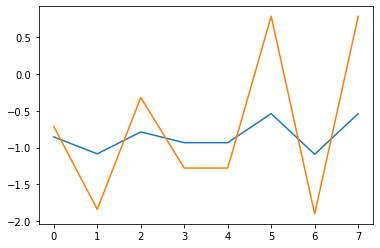

In [17]:
import matplotlib.pyplot as plt

# Membuat plot x_pca
plt.plot(x_pca[0:8])

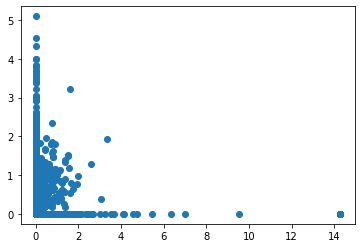

In [18]:
# Membuat plot berupa scatter
plt.scatter(spambase_array[:,1], spambase_array[:,2])

Text(0, 0.5, 'Second Principal Component')

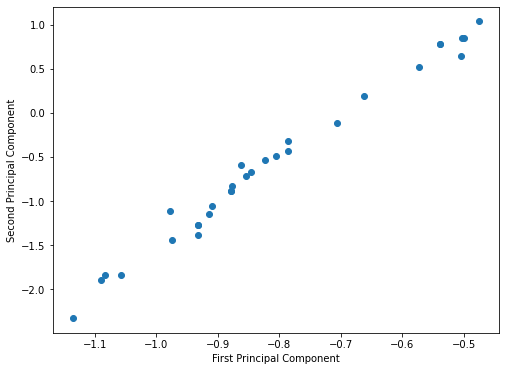

In [19]:
# Memberi plot yang lebih besar
plt.figure(figsize =(8, 6))
 
#plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.scatter(x_pca[0:30,0], x_pca[0:30,1])
 
# Memberi label sumbu x dan y
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [20]:
# Menampilkan komponen pca
print(pca.components_)

[[-7.337e-03 -1.133e-02 -1.861e-02 -5.088e-03 -2.032e-02 -6.460e-03
  -9.204e-03 -7.606e-03 -6.045e-03 -1.518e-02 -4.995e-03 -3.392e-02
  -5.736e-03 -3.032e-03 -3.701e-03 -3.146e-03 -1.103e-02 -1.251e-02
  -1.187e-01 -6.858e-03 -6.067e-02 -8.209e-03 -8.275e-03 -8.578e-03
   9.659e-03  9.003e-03  9.883e-01  8.080e-03  7.500e-03  8.219e-03
   8.177e-03  9.192e-03 -1.794e-03  9.150e-03  7.863e-03  7.054e-03
  -2.587e-04 -4.919e-04  1.141e-03  7.445e-03 -1.295e-03  6.844e-04
   1.202e-03 -1.186e-03 -3.116e-03 -9.804e-03 -2.123e-04  9.804e-04
  -1.325e-03 -1.066e-03 -3.439e-04 -2.061e-02 -5.899e-03 -2.676e-03
  -3.139e-02]
 [-2.292e-02  1.063e-02 -4.016e-02 -7.422e-03 -4.417e-02 -1.770e-02
  -2.983e-02 -1.517e-02 -1.341e-02 -2.892e-02 -1.803e-02 -2.816e-02
  -1.732e-02 -6.656e-03 -9.299e-03 -6.619e-02 -2.900e-02 -2.653e-02
  -6.201e-01 -2.111e-02 -2.482e-01 -4.582e-03 -2.641e-02 -3.999e-02
   6.252e-01  2.346e-01 -1.140e-01  1.013e-01  7.877e-02  9.803e-02
   7.187e-02  5.950e-02  2.339e-02

The remaining attributes represent relative frequencies of various important words and characters in emails. This is true for all attributes except `is_spam` which represents whether the e-mail was annotated as spam or not. So each e-mail is represented by a 55 dimensional vector representing whether or not a particular word exists in an e-mail. This is the so called [bag of words](http://en.wikipedia.org/wiki/Bag_of_words_model) representation and is clearly a very crude approximation since it does not take into account the order of the words in the emails.

### ========== Question 3 ==========

Now let's get a feeling of the distribution of ham (i.e. valid) vs. spam emails. We can do this by using a [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) in seaborn.

**a)** Produce a seaborn [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) object that shows the distribution of ham/spam e-mails. Assign it to a variable (e.g. `ax` to emphasise it is a [matplotlib.axes.Axes](http://matplotlib.org/api/axes_api.html#axes) object)
  
**b)** In the same cell, modify the labels on the x axis (`xticklabels`) to `Ham` and `Spam` (by default they should be set to `0.0` and `1.0`). *Hint: Axes objects have a [`set_xticklabels`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) method!* 
  
**c)** Finally, again in the same cell, remove the `is_spam` label from the x axis (`xlabel`) since it does not add any information to the graph

You may notice `<matplotlib.text.Text at ...memory_location...>` printed by the ipython notebook. This is just because the notebook is inferring how to display the last object in the cell. To explicitly plot the Axes object, use the `matplotlib.pyplot.show()` method at the very end of the cell, i.e. `plt.show()` (we imported the `matplotlib.pyplot` module as `plt` above)

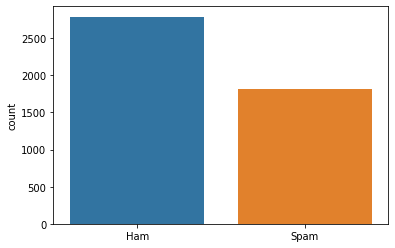

In [21]:
# Membuat seaborn countplot yang menampilkan distribusi email ham/spam
ax = sns.countplot(x='is_spam', data=spambase)
ax.set_xticklabels(['Ham', 'Spam']) # Menamai label sumbu x
plt.xlabel('')
plt.show()

Now we want to simplify the problem by transforming our dataset. We will replace all numerical values which represent word frequencies with a binary value representing whether each word was present in a document or not.

### ========== Question 4 ==========

**a)** Crate a new dataframe called `spambase_binary` from `spambase`. *Hint*: Look into the [`copy`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html) method in pandas. *Tip*: Be careful, in python, unless you explictly say not to, assigment is typically just reference e.g.
```python
i = [1, 3]
j = i
i[1] = 5
print(j)
```
outputs:
```
[1, 5]
```

In [22]:
# Membuat dataframe baru bernama spambase_binary
spambase_binary = spambase.copy(deep=True)

**b)** Convert all attributes in `spambase_binary` to Boolean values: 1 if the word or character is present in the email, or 0 otherwise.

In [23]:
# Mengonversi semua atribut dalam spambase_binary ke nilai boolean
spambase_binary[spambase_binary > 0] = 1

**c)** Display the 5 last observations of the transformed dataset.

In [24]:
# Menampilkan 5 observasi terakhir dari dataset yang telah ditransformasi
spambase_binary.tail(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
4596,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4598,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4599,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4600,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Visualisation

Now we want to get a feeling for how the presence or absence of some specific words could affect the outcome (whether an email is classifed as *ham* or *spam*). We will be focusing on three specific words, namely `make`, `internet` and `edu`.

### ========== Question 5 ==========

**a)** Using seaborn, produce one figure with three [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), one for each of the frequency variables for the words `make`, `internet` and `edu`. For each variable, the count plot should have two bars: the number of emails containing the word (i.e. the variable = 1), and the number not containing that word (i.e. the variable = 0).

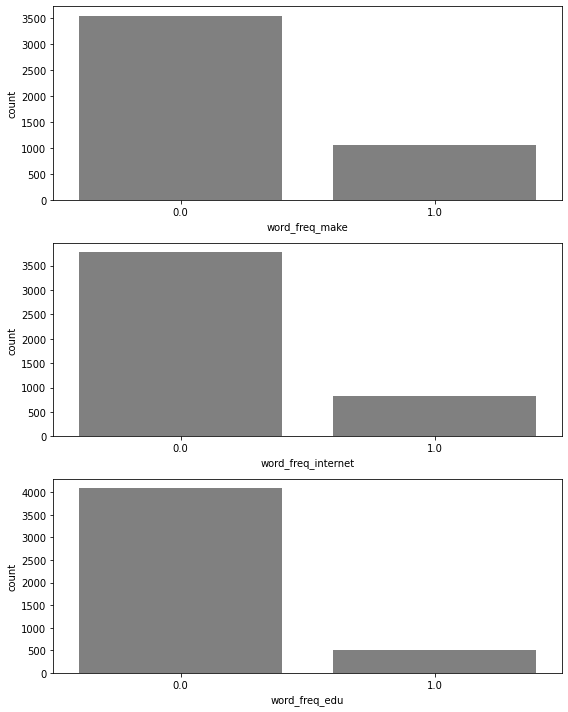

In [25]:
# Membuat countplot untuk setiap frekuensi variabel kata 'make', 'internet', dan 'edu'
words_of_interest = ['word_freq_' + word for word in ['make', 'internet', 'edu']]
n_words = len(words_of_interest)
plt.subplots(n_words, figsize=(8,10))
for i, word in enumerate(words_of_interest):
    plt.subplot(n_words,1,i+1)
    # Grey colour chosen such that the meaning of 1 and 0 is
    # not confused between plots. It is good practice to use
    # colour only when it is meaningful, and to not mix 
    # colour meanings between similar plots
    sns.countplot(x=word, data=spambase_binary, color='Gray') 
plt.tight_layout()
plt.show()

**b)** Repeat the above but split the bars showing the proportion of emails that are spam/ham. *Hint*: This only requires you to use the `hue` input argument to use different colours for the `is_spam` variable.

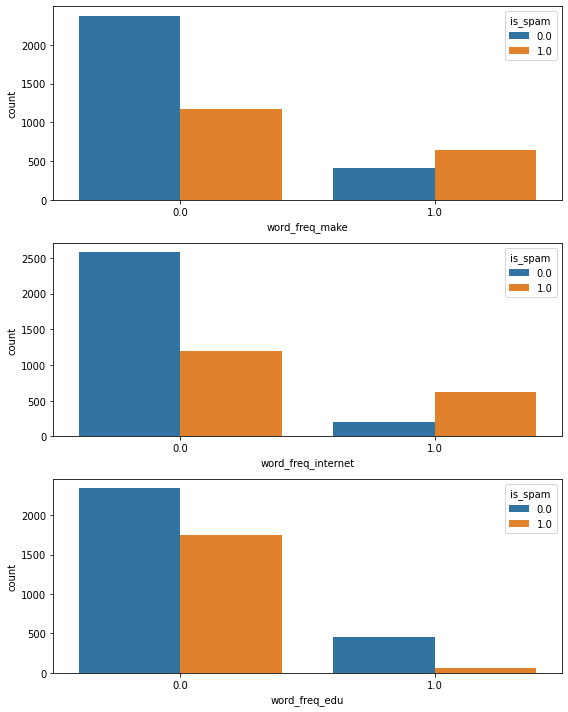

In [26]:
# Ulangi langkah sebelumnya dengan diagram batang menunjukkan proporsi email spam/ham
words_of_interest = ['word_freq_' + word for word in ['make', 'internet', 'edu']]
n_words = len(words_of_interest)
plt.subplots(n_words, figsize=(8,10))
for ii, word in enumerate(words_of_interest):
    plt.subplot(n_words, 1, ii+1)
    sns.countplot(x=word, hue='is_spam', data=spambase_binary)
plt.tight_layout()
plt.show()

## Multinomial Naive Bayes classification

Given the transformed dataset, we now wish to train a Naïve Bayes classifier to distinguish spam from regular email by fitting a distribution of the number of occurrences of each word for all the spam and non-spam e-mails. Read about the [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) and the underlying assumption if you are not already familiar with it. In this lab we focus on the [Multinomial Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Multinomial_naive_Bayes). 

We will make use of the `MultinomialNB` class in `sklearn`. **Check out the user guide [description](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) and [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) to familiarise yourself with this class.**

All classifiers in `sklearn` implement a `fit()` and `predict()` [method](https://en.wikipedia.org/wiki/Method_%28computer_programming%29). The first learns the parameters of the model and the latter classifies inputs. For a Naive Bayes classifier, the [`fit()`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.fit) method takes at least two input arguments `X` and `y`, where `X` are the input features and `y` are the labels associated with each example in the training dataset (i.e. targets). 

As a first step we extract the input features and targets from the DataFrame. To do so, we will use the [`values`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) property. For the input features we want to select all columns except `is_spam` and for this we may use the [`drop`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) method which discards the specified columns along the given axis. In fact, we can combine these two operations in one step.

### ========== Question 6 ==========

**a)** Create a Pandas DataFrame object `X` containing only the features (i.e. exclude the label `is_spam`). We need to do this as it is the input Scikit-learn objects expect for fitting. *Hint*: make use of the `drop` method.

In [27]:
# Membuat dataframe X dan membuang label 'is_spam'
X = spambase_binary.drop('is_spam', axis=1)

**b)** Create a Pandas Series object `y` that contains only the label from `spambase_binary`.

In [28]:
# Membuat series y yang hanya berisi label dari spambase_binary
y = spambase_binary['is_spam']

**c)** Display the dimensionality (i.e. `shape`) of each of the two arrays. *Hint:* The shape of `X` and `y` should be `(4601, 54)` and `(4601,)` respectively.

In [29]:
# Menampilkan dimensi array
print('Input features shape: {}'.format(X.shape))
print('Targets shape: {}'.format(y.shape))

Input features shape: (4601, 54)
Targets shape: (4601,)


### ========== Question 7 ==========

Now we want to train a Multinomial Naive Bayes classifier. Initialise a `MultinomialNB` object and [`fit`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit) the classifier using the `X` and `y` arrays extracted in the cell above.

In [30]:
# Mengganti NaN dengan angka nol dan tak hingga dengan angka yang sangat besar pada dataframe X dan y
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [31]:
# Train Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X=X, y=y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)